# Sentiment Analysis using Linear and Logistic Regression

This notebook deals with the sentiment analysis classification of Amazon Review Dataset using linear and logistic regression after using "Vader Analyzer"

## Overview

Based on the Amazon customer product review datasets which are available at: https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt 

This site contains a number of large review datasets made available by Amazon and broken down by product category. We will sample a number of these, taking into account the need to keep the sample representative of the larger datasets. This will be done by using the 'star_rating', 'vine' and 'verified_purchase' features to proportionally reduce the dataset for performance reasons. 

The dataset was chosen for its richness of features, the flexibility of classification that they will present and for the opportunity to run some sentiment analysis on the reviews. The main challenge will be in drawing meaningful conclusions from the reduced dataset.   

We'd be interested in investigating topics like the following:

- Are there anomalous patterns (perhaps indicating fake reviews) ?  
- Do sentiments change across product groups? Are people more likely to complain about certain product groups? Can we see a decline in customer satisfaction over time on certain products?
- Do people find certain types of reviews helpful? What is it about the review that might make it helpful?
- Do paid for reviews impact the review itself (feature 'vine' in the dataset) and is it possible to predict whether the review is by a Vine program member based on the review text?
- Impact of verified/non verified status on the review helpfulness and in turn how it affects the product sentiment 

## Summary 

The dataset chosen is "Amazon Customer Product Reviews".  It will also allow to compare sentiment (as expressed in the text reviews) against the quantatitive scores which could give an insight into how people subjectively perceive, and and then objectively categorise, their experiences. 




### Random sampling

The original dataset has over three million rows of data which is challenging to handle. A subset of this is chosen using random smapling within the Pandas package. This subset should have a very similar distribution as the orginal provided that subset is large enough (Usually over 10000 rows). This will hoepfully reduce the computaional load whilst not drastically changing the result.

# Dataset Link

url = 'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Electronics_v1_00.tsv.gz'


In [1]:
import torch
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
# import numpy as np
import os
import tarfile
import urllib
# import pandas as pd
import urllib.request

# To plot pretty figures
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
style.use('ggplot')
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import datetime
from sklearn.impute import SimpleImputer
datetime.datetime.strptime
from sklearn.preprocessing import OneHotEncoder  
from sklearn.feature_extraction.text import CountVectorizer
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#import sklearn.feature_selection.RFE as RFE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import tensorflow as tf
from transformers import BertTokenizer, BertModel
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

C:\Users\vikra\anaconda3\envs\MachineLearning\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vikra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vikra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vikra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
def check_accuracy(y_pred, Y_test, header, df_hold_scores ):
    
    print('\n')
    print('\033[1m' + header + '\033[0m')
    print('\n')
    
    class_tree = accuracy_score(y_pred, Y_test)
    df_hold_scores.loc[len(df_hold_scores)] = [ header , class_tree]   
    
    print("Test accuracy: {:.2f}%".format(class_tree*100))

    confusion_matrix_1 = confusion_matrix(Y_test, y_pred)

    my_matrix = sns.heatmap(confusion_matrix_1, annot=True, cmap='Blues')
    my_matrix.set_title('Accuracy');
    my_matrix.set_xlabel('\nPredicted Values')
    my_matrix.set_ylabel('Actual Values ');
    my_matrix.xaxis.set_ticklabels(['False','True'])
    my_matrix.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

# Displaying the
    print(confusion_matrix(Y_test, y_pred))
    print("\n")
    print(classification_report(Y_test, y_pred))
    print(roc_auc_score(Y_test, y_pred))

    fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
    display.plot()
    plt.show()

In [3]:
df_original = pd.read_csv('C:/Users/vikra/Downloads/AmazonMergedDataset/AmazonMergedDataset.tsv', sep='\t', on_bad_lines='skip')
df_original["review_length"] = df_original["review_body"].map(str).apply(len)
df_original.head()
df_hold_scores = pd.DataFrame(columns=['header', 'score'])

## Data Cleaning

### Removing coloumns not being used

The marketplace, product_category and review_id coloumns are not likely to be used in the analysis, so are removed to decrease the size of the dataset.

In [4]:

df_original.isna().sum()
df_original = df_original.dropna(subset=['review_body'])
df_original = df_original.dropna(subset=['review_headline'])
df_original = df_original.dropna(subset=['review_date'])
df_original = df_original.dropna(subset=['product_title'])
df_original["review_date"] = pd.to_datetime(df_original["review_date"]).dt.date

df_original['sentiment'] = df_original['star_rating'].apply(lambda star_rating : +1 if star_rating > 3 else 0)
df_subset = df_original.sample(n=10000,  random_state=42)
df_subset = df_subset[(df_original['review_date']>datetime.date(2013,1,1)) & (df_original['review_date']<datetime.date(2015,12,31))]



## Text Analysis

In [5]:
analyzer = SentimentIntensityAnalyzer()
def vader_sentiment_result(sent):
    scores = analyzer.polarity_scores(sent)
    return  scores 


df_text_subset = df_subset.copy()
#vader_sentiment_result
df_text_subset["vader_headline"] = df_text_subset["review_headline"].apply(lambda x: vader_sentiment_result(x))
df_text_subset = pd.concat([df_text_subset.drop(['vader_headline'], axis=1), df_text_subset['vader_headline'].apply(pd.Series)], axis=1)

df_text_subset.rename(columns = {'neg':'neg_h', 'neu':'neu_h', 'pos':'pos_h', 'compound':'compound_h'}, inplace = True)
df_text_subset["vader_body"] = df_text_subset["review_body"].apply(lambda x: vader_sentiment_result(x))

df_text_subset = pd.concat([df_text_subset.drop(['vader_body'], axis=1), df_text_subset['vader_body'].apply(pd.Series)], axis=1)
df_text_subset.rename(columns = {'neg':'neg_b', 'neu':'neu_b', 'pos':'pos_b', 'compound':'compound_b'}, inplace = True)

# Move sentiment to end of column 
df_text_subset = pd.concat([df_text_subset, df_text_subset.pop('sentiment')], 1)

label = LabelEncoder()

# Target values
XX = df_text_subset[['neg_h', 'neu_h', 'pos_h', 'compound_h', 'neg_b', 'neu_b', 'pos_b', 'compound_b']]
YY = df_text_subset.iloc[:, -1 ]


# Split into Train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, random_state=0)

# Correlation of values with sentiment 
corr_matrix = df_text_subset.corr()
print(corr_matrix["sentiment"].sort_values(ascending=False))
print(df_text_subset.columns)

sentiment         1.000000
star_rating       0.914810
compound_b        0.479411
compound_h        0.391777
pos_b             0.354844
pos_h             0.292532
customer_id       0.003091
product_parent   -0.004202
helpful_votes    -0.042316
review_length    -0.057039
total_votes      -0.077083
neu_h            -0.122688
neu_b            -0.237122
neg_b            -0.366678
neg_h            -0.381242
Name: sentiment, dtype: float64
Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'review_length',
       'neg_h', 'neu_h', 'pos_h', 'compound_h', 'neg_b', 'neu_b', 'pos_b',
       'compound_b', 'sentiment'],
      dtype='object')


# Linear regression 

In [6]:
# Train Data
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

#Predict train and test values
vader_test_predict = lin_reg.predict(X_test)
vader_train_predict = lin_reg.predict(X_train)

# Calculate mean squared error
out_loss_train = mean_squared_error(Y_train, vader_train_predict, multioutput='raw_values')
out_loss_test = mean_squared_error(Y_test, vader_test_predict, multioutput='raw_values')
print("Training Set prediction Loss Average: ", out_loss_train)
print("Test Set prediction Loss Average: ",  out_loss_test)


Training Set prediction Loss Average:  [0.1073022]
Test Set prediction Loss Average:  [0.11228944]


# Ridge Regression

In [38]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, Y_train)
#Predict train and test values
vader_ridge_test_predict = clf.predict(X_test)
vader_ridge_train_predict = clf.predict(X_train)

# Calculate mean squared error
out_loss_train = mean_squared_error(Y_train, vader_ridge_train_predict, multioutput='raw_values')
out_loss_test = mean_squared_error(Y_test, vader_ridge_test_predict, multioutput='raw_values')
print("Ridge Training Set prediction: ", out_loss_train)
print("Ridge Test Set prediction: ",  out_loss_test)

Ridge Training Set prediction:  [0.10734098]
Ridge Test Set prediction:  [0.11238615]


# Attempt at manual running of linear regression 

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_train, Y_train, rcond=1e-6)
theta_best_svd

array([-0.09877762,  0.37960284,  0.46626314,  0.12158301, -0.32036209,
        0.22856861,  0.5299314 ,  0.18428225])

In [9]:
X_lin_train = np.c_[np.ones((len(X_train), 1)), X_train]  # add x0 = 1 to each instance
X_lin_test = np.c_[np.ones((len(X_test), 1)), X_test]  # add x0 = 1 to each instance


Train_mean_error_tracking = pd.DataFrame(columns=['Train'])
Test_mean_error_tracking = pd.DataFrame(columns=['Test'])

Y_train_array = Y_train.to_numpy() 
Y_train_array = np.reshape(Y_train_array, (len(Y_train_array),1))

Y_test_array = Y_train.to_numpy() 
Y_test_array = np.reshape(Y_test_array, (len(Y_test_array),1))


eta = 0.1  # learning rate
n_iterations = 30
m = len(X_lin_train)

theta = np.random.randn(9,1)  # random initialization of the weights
#
for iteration in range(n_iterations):
    gradients = 2/m * X_lin_train.T.dot(X_lin_train.dot(theta) - Y_train_array)# This is the gradient descent iteration 
    theta = theta - eta * gradients                # theta are the weights and updated acording to the gradient descent
        
    predicted_train_values = np.sum(X_lin_train.dot(theta), axis=1)
    out_loss_train = mean_squared_error(Y_train, predicted_train_values, multioutput='raw_values')
    
    predicted_test_values = np.sum(X_lin_test.dot(theta), axis=1)
    out_loss_test = mean_squared_error(Y_train, predicted_train_values, multioutput='raw_values')
    
    Train_mean_error_tracking.loc[len(Train_mean_error_tracking)] = [ out_loss_train ] 
    Test_mean_error_tracking.loc[len(Test_mean_error_tracking)] = [ out_loss_test ] 
                                   

print("Training Error")            
print(Train_mean_error_tracking)  

print("")  
print("Testing Error during training")            
print(Test_mean_error_tracking)    
    

Training Error
                    Train
0    [2.7240619003641062]
1     [1.223604447787115]
2    [0.7723047071557758]
3    [0.6057592672220056]
4    [0.5208459471872162]
5    [0.4629944084868684]
6    [0.4170322471804869]
7   [0.37830609288478423]
8     [0.345031496536345]
9    [0.3162581044054007]
10  [0.29132128289196957]
11  [0.26968820892561146]
12  [0.25090948582746525]
13  [0.23459971495058846]
14  [0.22042663205313784]
15  [0.20810329208299613]
16   [0.1973817363425172]
17  [0.18804763527551704]
18  [0.17991569292005377]
19   [0.1728256874562677]
20  [0.16663905510848248]
21  [0.16123594150319648]
22  [0.15651265608025788]
23  [0.15237947427062193]
24  [0.14875873980770485]
25  [0.14558322608727742]
26  [0.14279472112604766]
27  [0.14034280552767936]
28   [0.1381837970563946]
29  [0.13627983903478694]

Testing Error during training
                     Test
0    [2.7240619003641062]
1     [1.223604447787115]
2    [0.7723047071557758]
3    [0.6057592672220056]
4    [0.5208459471

## Logistic Regression

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()



Reg_test


Test accuracy: 84.04%


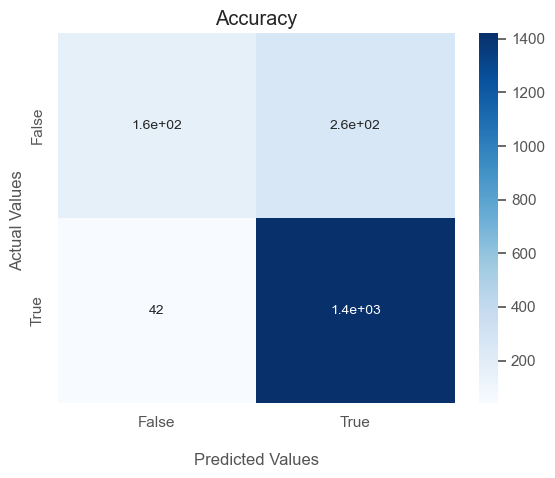

[[ 164  259]
 [  42 1421]]


              precision    recall  f1-score   support

           0       0.80      0.39      0.52       423
           1       0.85      0.97      0.90      1463

    accuracy                           0.84      1886
   macro avg       0.82      0.68      0.71      1886
weighted avg       0.83      0.84      0.82      1886

0.6794993609103352


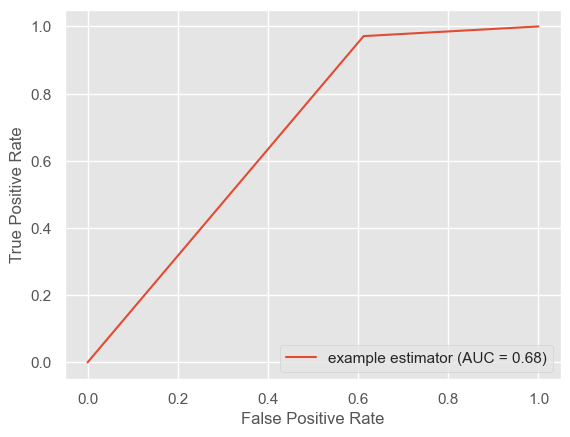

In [11]:

logreg_test_pred = logreg.predict(X_test)
logreg_train_pred = logreg.predict(X_train)

#check_accuracy(logreg_train_pred, Y_train, 'Reg_train', df_hold_scores)
check_accuracy(logreg_test_pred, Y_test, 'Reg_test', df_hold_scores)



## Checking Scaling



Reg_test


Test accuracy: 84.04%


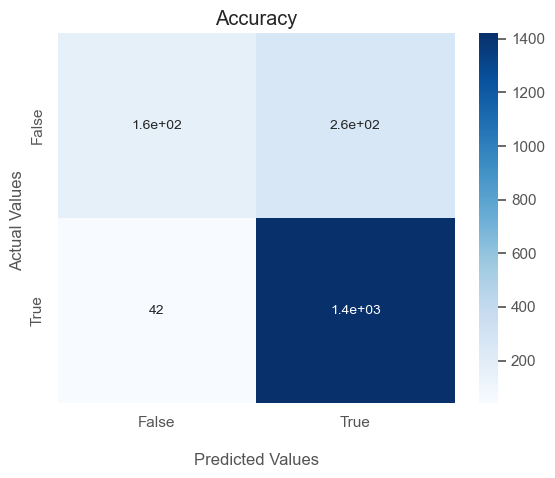

[[ 164  259]
 [  42 1421]]


              precision    recall  f1-score   support

           0       0.80      0.39      0.52       423
           1       0.85      0.97      0.90      1463

    accuracy                           0.84      1886
   macro avg       0.82      0.68      0.71      1886
weighted avg       0.83      0.84      0.82      1886

0.6794993609103352


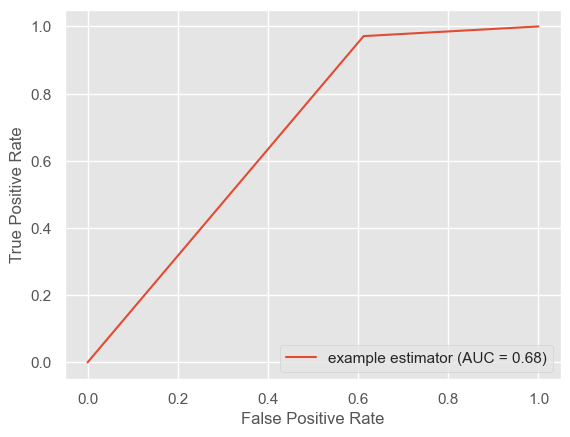

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_scaled = LogisticRegression()
logreg_scaled.fit(X_train_scaled, Y_train)

logreg_test_pred_scaled = logreg.predict(X_test_scaled)
logreg_train_pred_scaled = logreg.predict(X_train_scaled)

#check_accuracy(logreg_train_pred_scaled, Y_train, 'Reg_train', df_hold_scores)
check_accuracy(logreg_test_pred, Y_test, 'Reg_test', df_hold_scores)


## GRID SEARCH

In [13]:
from sklearn.model_selection import GridSearchCV

grid_param_1 = ['lbfgs','newton-cg','liblinear','sag','saga']
grid_param_2 = [ 1, 2, 3, 5, 10, 15 ]

clf = GridSearchCV(logreg, param_grid = {'solver': grid_param_1,'max_iter' : grid_param_2}, cv=3, scoring='roc_auc', verbose=True, return_train_score='true', n_jobs=-1)
clf.fit(X_train, Y_train)




Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [1, 2, 3, 5, 10, 15],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             return_train_score='true', scoring='roc_auc', verbose=True)

In [14]:
clf.best_estimator_

LogisticRegression(max_iter=3, solver='saga')

In [15]:
results = pd.DataFrame.from_dict(clf.cv_results_)

In [16]:
def show3D(clf, grid_param_1, grid_param_2, name_param_1, name_param_2, score_type, title, rot=80):
    scores_mean = clf.cv_results_[score_type]
    scores_mean = np.array(scores_mean).reshape(len(grid_param_1), len(grid_param_2)).T
    print (score_type)
    print('Best params = {}'.format(clf.best_params_))
    print('Best score = {}'.format(scores_mean.max()))

    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx, :], '-o', label=name_param_2 + ': ' + str(val))

    ax.tick_params(axis='x', rotation=rot)
    ax.set_title(title)
    ax.set_xlabel(name_param_1)
    ax.set_ylabel('CV score')
    ax.legend(loc='best')
    ax.grid('on')

mean_test_score
Best params = {'max_iter': 3, 'solver': 'saga'}
Best score = 0.8695753756754755


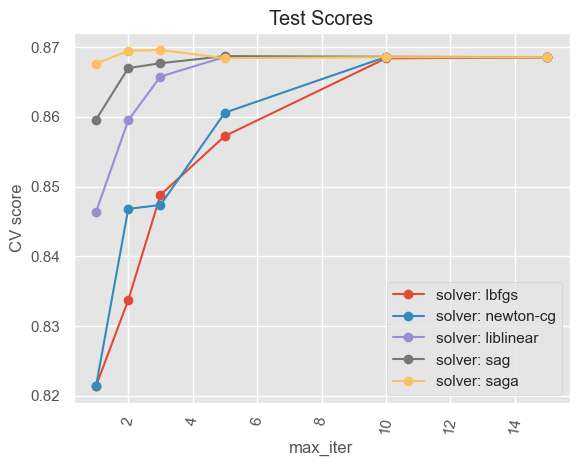

In [17]:
show3D(clf, grid_param_2, grid_param_1, "max_iter", "solver", "mean_test_score", "Test Scores")

mean_train_score
Best params = {'max_iter': 3, 'solver': 'saga'}
Best score = 0.8698142210748389


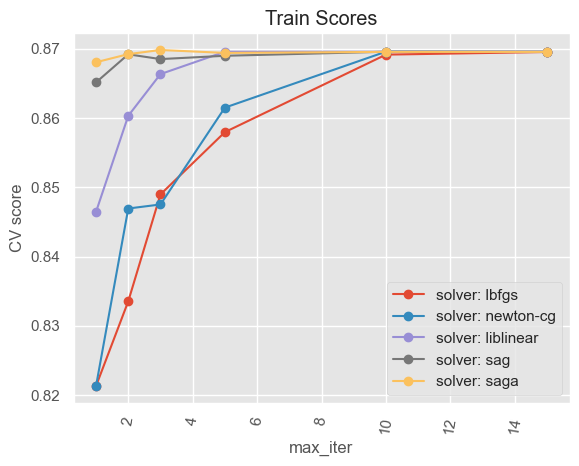

In [18]:
show3D(clf, grid_param_2, grid_param_1, "max_iter", "solver", "mean_train_score", "Train Scores")

## Logistic regression using SGD (Stochastic Gradient Descent)

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [20]:
learn_rate_constant = 0.1
clf_SGD = SGDClassifier(loss="log_loss", penalty="l2", learning_rate = 'constant' , eta0 = learn_rate_constant, shuffle = True)


In [21]:
def batch(iterable_X, iterable_y, n=1):
    l = len(iterable_X)
    for ndx in range(0, l, n):
        yield iterable_X[ndx:min(ndx + n, l)], iterable_y[ndx:min(ndx + n, l)]


In [22]:
def batch_run(epochs, batch_size, X_train_data, Y_train_data, X_test_data, Y_test_data, clf_SGD):
    for _ in range(epochs):
        batcherator = batch(X_train_data, Y_train_data, batch_size)
        for index, (chunk_X, chunk_y) in enumerate(batcherator):
            clf_SGD.partial_fit(chunk_X, chunk_y, classes=[0, 1])

            y_predicted_SGD = clf_SGD.predict(X_test_data)
    return accuracy_score(Y_test_data, y_predicted_SGD)     

In [23]:
epochs = 1
batch_size_list = [1, 10, 20, 50, 100, 200, 400, 500,1000, 1500, 2000, 3000]
accuracy_list = []
for b in batch_size_list:
    temp = batch_run(epochs, b, X_train, Y_train, X_test, Y_test, clf_SGD)
    accuracy_list.append(temp)

<BarContainer object of 12 artists>

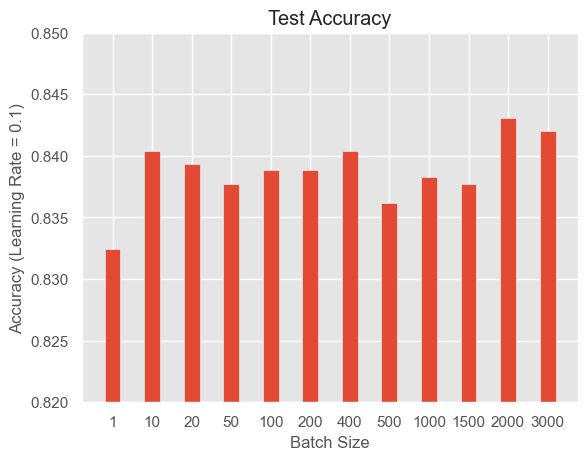

In [24]:
X_axis = [str(x) for x in batch_size_list]

plt.xlabel("Batch Size")
plt.title("Test Accuracy")
plt.ylabel("Accuracy (Learning Rate = 0.1)")
plt.ylim(0.82, 0.85)
plt.bar(X_axis,accuracy_list , width = 0.4 )

## GRID SEARCH 

In [33]:
 
grid_param_1 = [0.0001, 0.001, 0.01, 0.1, 0.2]
grid_param_2 = [ 10, 15, 20, 30, 40, 60, 80, 100 , 120, 150, 200]

model = SGDClassifier(loss="log_loss", penalty="l2", learning_rate = 'constant')
clf_grid = GridSearchCV(model, param_grid = {'eta0' : grid_param_1, 'max_iter' : grid_param_2} ,cv=3, scoring='roc_auc', verbose=True, return_train_score='true', n_jobs=-1)
clf_grid.fit(X_train, Y_train)



Fitting 3 folds for each of 55 candidates, totalling 165 fits


GridSearchCV(cv=3,
             estimator=SGDClassifier(learning_rate='constant', loss='log_loss'),
             n_jobs=-1,
             param_grid={'eta0': [0.0001, 0.001, 0.01, 0.1, 0.2],
                         'max_iter': [10, 15, 20, 30, 40, 60, 80, 100, 120, 150,
                                      200]},
             return_train_score='true', scoring='roc_auc', verbose=True)

In [34]:
clf_grid.best_estimator_

SGDClassifier(eta0=0.1, learning_rate='constant', loss='log_loss', max_iter=80)

In [35]:
results_grid = pd.DataFrame.from_dict(clf_grid.cv_results_)
results_grid.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta0,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
39,0.014476,1.997778e-03,0.002667,0.003772,0.1,80,"{'eta0': 0.1, 'max_iter': 80}",0.869013,0.864522,0.875075,0.869537,0.004324,1,0.868570,0.872048,0.869598,0.870072,0.001459
45,0.010417,7.365920e-03,0.005208,0.007366,0.2,15,"{'eta0': 0.2, 'max_iter': 15}",0.867968,0.865497,0.874779,0.869415,0.003925,2,0.870339,0.872545,0.868582,0.870489,0.001621
38,0.013085,3.594283e-03,0.002666,0.003771,0.1,60,"{'eta0': 0.1, 'max_iter': 60}",0.868239,0.864985,0.873877,0.869033,0.003673,3,0.869974,0.871298,0.865716,0.868996,0.002382
37,0.015752,1.761771e-04,0.002667,0.003772,0.1,40,"{'eta0': 0.1, 'max_iter': 40}",0.867644,0.865082,0.873871,0.868866,0.003691,4,0.869444,0.870796,0.867067,0.869102,0.001541
40,0.010667,7.543050e-03,0.002667,0.003772,0.1,100,"{'eta0': 0.1, 'max_iter': 100}",0.866329,0.866212,0.874005,0.868848,0.003647,5,0.868896,0.872531,0.867274,0.869567,0.002198
48,0.015622,0.000000e+00,0.000000,0.000000,0.2,40,"{'eta0': 0.2, 'max_iter': 40}",0.869648,0.861623,0.874985,0.868752,0.005492,6,0.869163,0.868452,0.868304,0.868640,0.000375
51,0.005210,7.367719e-03,0.005209,0.007366,0.2,100,"{'eta0': 0.2, 'max_iter': 100}",0.868553,0.862443,0.875218,0.868738,0.005217,7,0.868156,0.870256,0.866878,0.868430,0.001393
35,0.018464,4.011425e-03,0.002666,0.003771,0.1,20,"{'eta0': 0.1, 'max_iter': 20}",0.866945,0.865571,0.873594,0.868703,0.003503,8,0.869692,0.871848,0.868831,0.870123,0.001269
36,0.010419,7.367101e-03,0.005209,0.007366,0.1,30,"{'eta0': 0.1, 'max_iter': 30}",0.866386,0.865641,0.874066,0.868697,0.003808,9,0.869146,0.872445,0.867049,0.869547,0.002221
52,0.015626,0.000000e+00,0.000000,0.000000,0.2,120,"{'eta0': 0.2, 'max_iter': 120}",0.867543,0.863450,0.874553,0.868515,0.004585,10,0.868623,0.869740,0.868189,0.868851,0.000654


mean_test_score
Best params = {'eta0': 0.1, 'max_iter': 80}
Best score = 0.8695366283588718


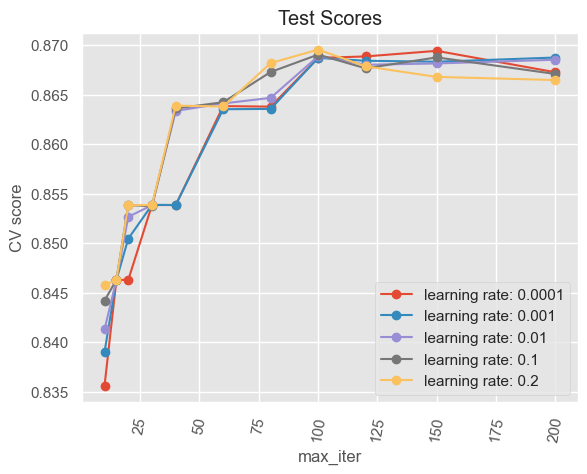

In [36]:
show3D(clf_grid, grid_param_2, grid_param_1, "max_iter", "learning rate", "mean_test_score", "Test Scores")